In [1]:
from sehec.envs.arenas.merging_rooms import MergingRoom2D
from sehec.utils import RandomAgent
import matplotlib.pyplot as plt

/Users/clementine/anaconda3/envs/sehec/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


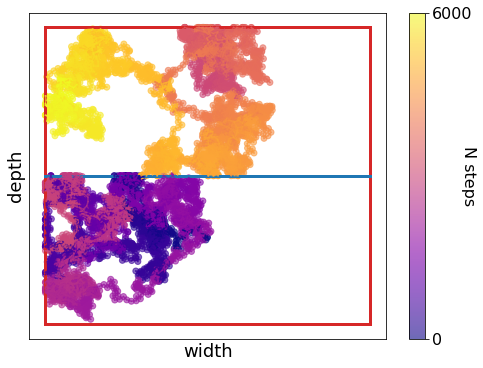

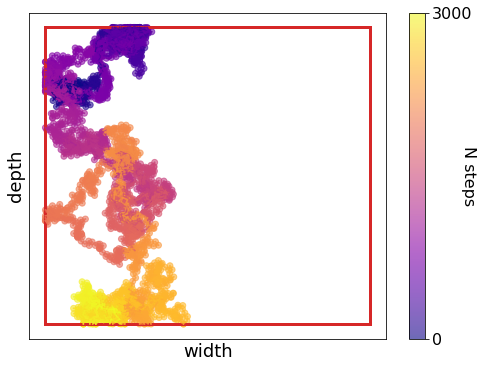

In [2]:

fontsize = 18
env_name = "MergingRoom"
time_step_size = 0.2
agent_step_size = 3
merging_time = 20
switch_time = 10
n_steps = ((merging_time + switch_time)*60) / time_step_size

env = MergingRoom2D(environment_name=env_name,
                    merge_time=merging_time,
                    switch_time=switch_time,
                    time_step_size=time_step_size,
                    agent_step_size=agent_step_size)
agent = RandomAgent()

obs, state = env.reset()
for j in range(round(n_steps)):
    # Observe to choose an action
    action = agent.act(obs)
    # Run environment for given action
    obs, state, reward = env.step(action)
    if j == ((merging_time*60)/time_step_size)-1:
        ax = env.plot_trajectory()
        ax.set_xlabel("width", fontsize=fontsize)
        ax.set_ylabel("depth", fontsize=fontsize)
        plt.savefig("pre_merge.pdf", bbox_inches="tight")
merged_history = env.history[int((merging_time*60)/time_step_size):]
ax=env.plot_trajectory(history_data=merged_history)
ax.set_xlabel("width", fontsize=fontsize)
ax.set_ylabel("depth", fontsize=fontsize)

plt.savefig("after_merge.pdf", bbox_inches="tight")
plt.show()